In [1]:
from random import random, randint
from collections import defaultdict
import numpy as np
from IPython.extensions.autoreload import update_property
from cv2.datasets import circle
from numpy.ma.core import argmax
import plotly.express as px
from pandas.core.interchange.dataframe_protocol import DataFrame
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# possible tiles for robot to be on
TILES = ["white", "black"]
# possible actions for robot to be on
ACTIONS = ["left", "right"]
# world for robot (possible states with actions)
WORLD = {
    "white": {"left": "white", "right": "black"},
    "black": {"left": "white", "right": "black"}
}
# strings such that changing is easier
string_white = "white"
string_black = "black"
string_left = "left"
string_right = "right"
# Line break between graphics
line_break = "-"*200
# change this value for more (or less) steps
n_steps = 8

In [3]:
def move(current_tile, action):
    return WORLD[current_tile][action]

In [4]:
class Robot:
    def __init__(self):
        self.histogram = defaultdict(int)
        self.current_tile = TILES[randint(0,1)]
        self.histogram_arrays = [[0.5, 0.5, 0.5, 0.5],[0.5, 0.5, 0.5, 0.5]]
        print(f"Robot started on the {self.current_tile} tile")
        print(line_break)

    # Update histogram
    def update_histogram(self, s, a, s_next):
        self.histogram[(s_next, s, a)] += 1

    # Compute probability
    def get_probability(self, s, a):
        white_count = self.histogram[("white", s, a)] + 1 # + 1 so we don't need to differentiate between first round (0) and rest
        # print("Current count for white: ", white_count)
        black_count = self.histogram[("black", s, a)] + 1 # + 1 so we don't need to differentiate between first round (0) and rest
        # print("Current count for black: ", black_count)
        total = white_count + black_count
        return {
            "white": white_count / total,
            "black": black_count / total
        }

    # Visualize the Histogram
    def show_histo(self):
        fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        for i, tile in enumerate(TILES):
            data = self.histogram_arrays[i]
            for j, action in enumerate(ACTIONS):
                # Compute index in flat array
                values = data[j*2:(j+1)*2]
                ax = axs[i*2 + j]
                ax.bar(TILES, values, color=["gray", "black"])
                ax.set_title(f'Tile: {tile}\nAction: {action}')
                ax.set_ylim(0, 1)
                ax.set_ylabel('Probability')
        plt.tight_layout()
        plt.show()

    # Update histogram_arrays and get probs for current tile
    def update_probability(self):
        probs = {}
        for t in TILES:
            array = []
            for a in ACTIONS:
                p = self.get_probability(t, a)
                array.append(p[string_white])
                array.append(p[string_black])
                if t == self.current_tile:
                    probs[a] = max(p.values())
            if t == string_white:
                self.histogram_arrays[0] = array.copy()
            else:
                self.histogram_arrays[1] = array.copy()
        self.show_histo()
        return probs

    # Choose next action depending on probs
    def choose_action(self):
        probs = self.update_probability()
        max_p = max(probs.values())
        best_actions = [a for a in ACTIONS if probs[a] == max_p]
        return best_actions[randint(1, len(best_actions))-1]

    # Each step chooses (best) action, prints current Histogram, prints text, moves robot and updates histogram
    def step(self):
        action = self.choose_action()
        print(f"Robot is on {self.current_tile}, took action {action}")
        print(line_break)
        next_tile = move(self.current_tile, action)
        self.update_histogram(self.current_tile, action, next_tile)
        self.current_tile = next_tile


Robot started on the white tile
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


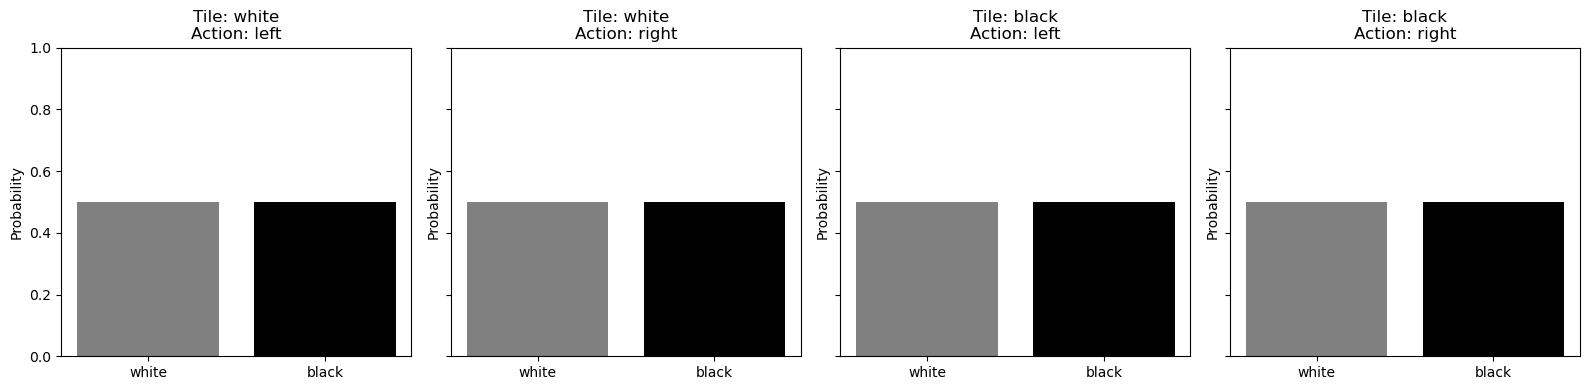

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


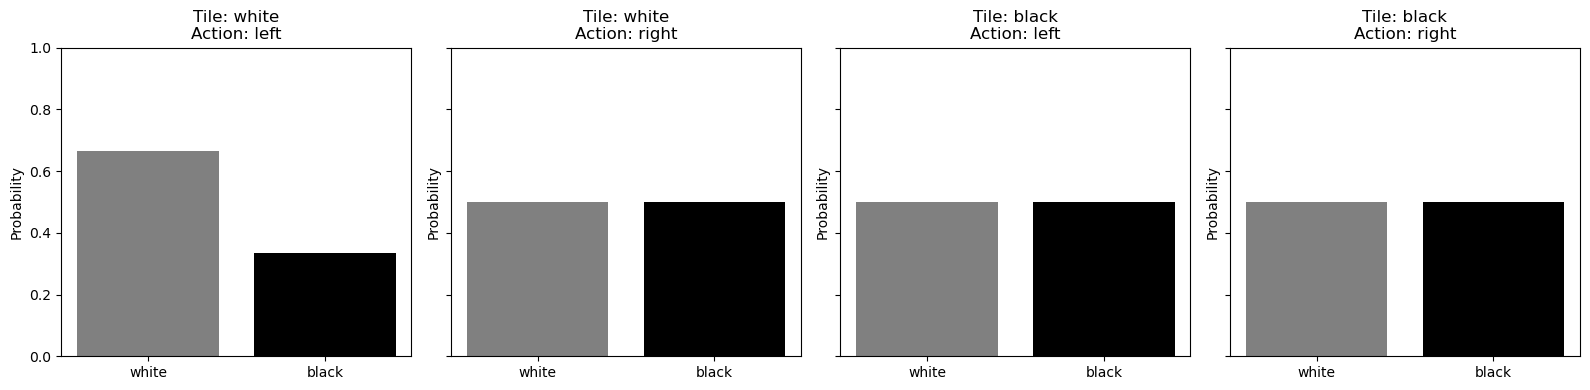

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


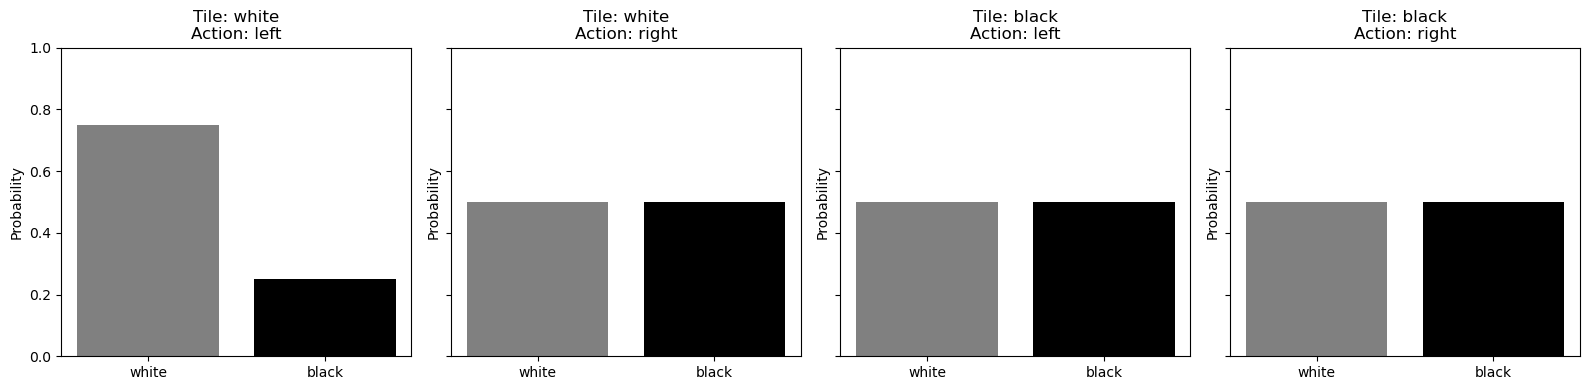

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


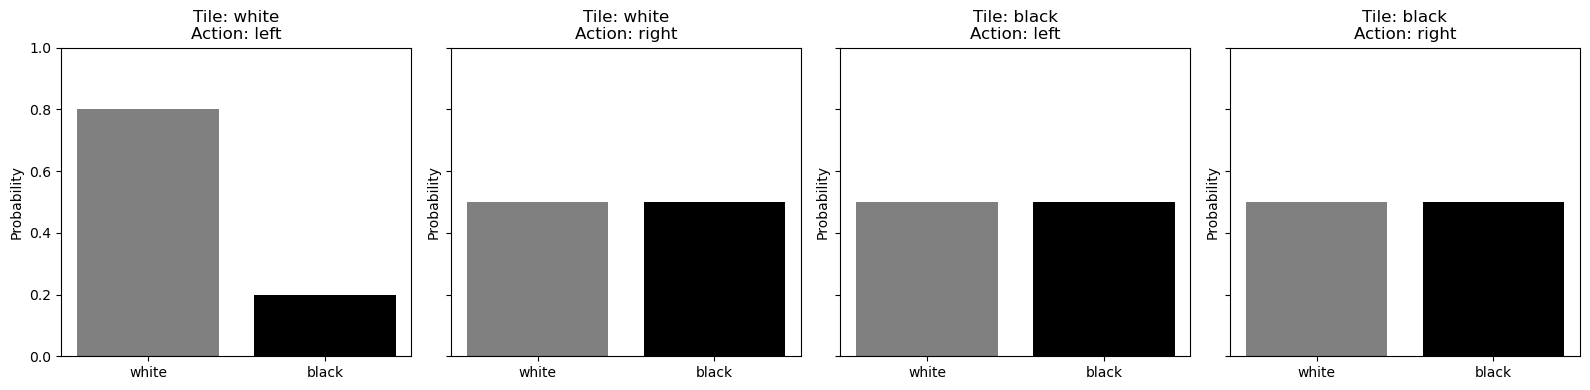

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


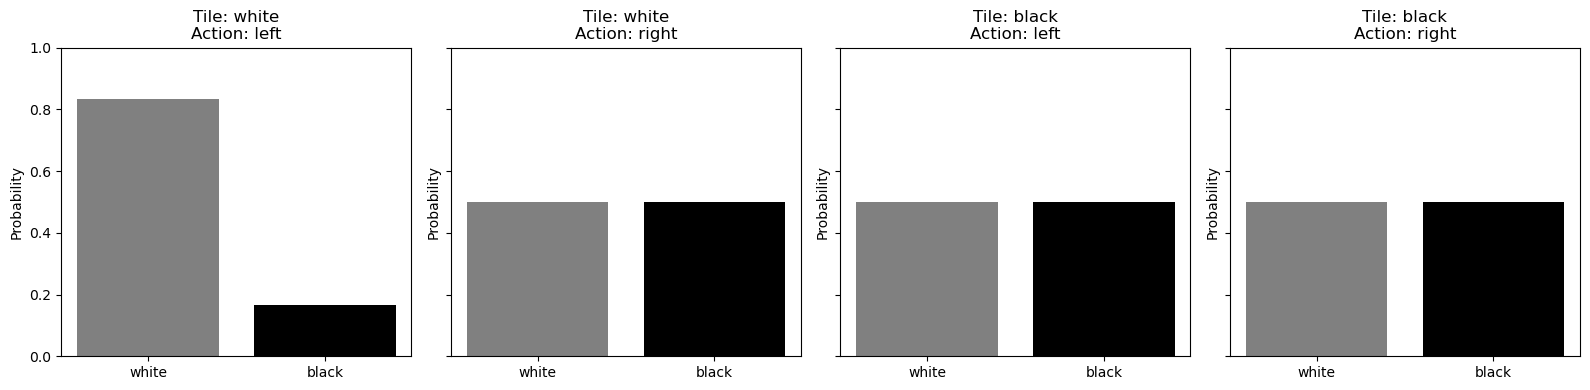

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


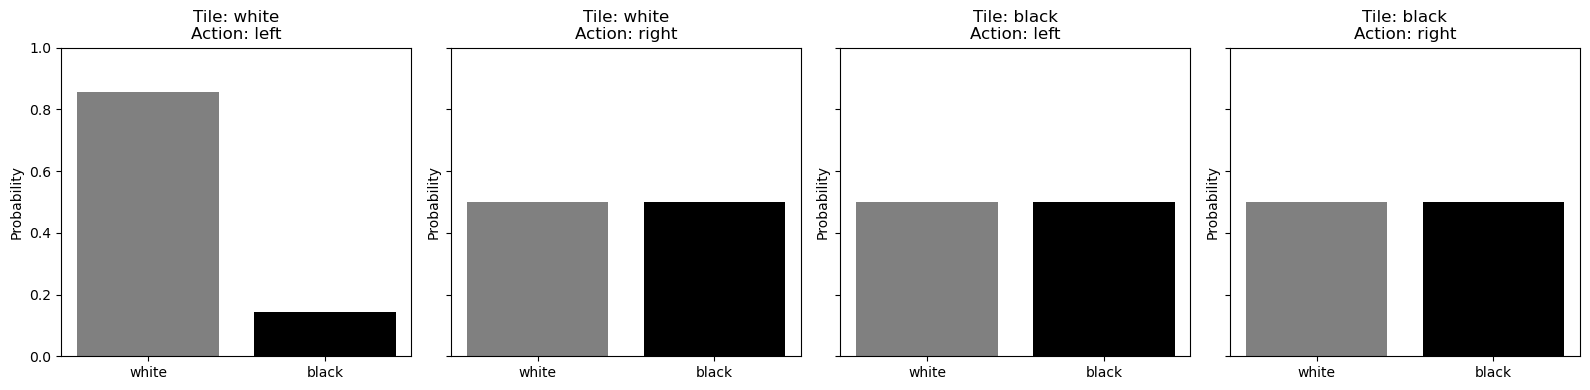

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


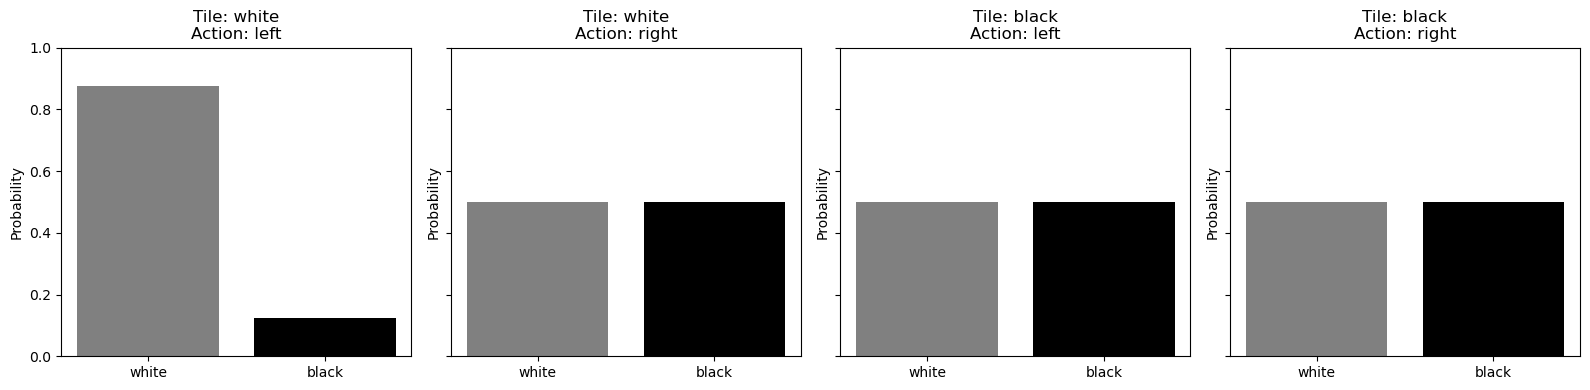

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


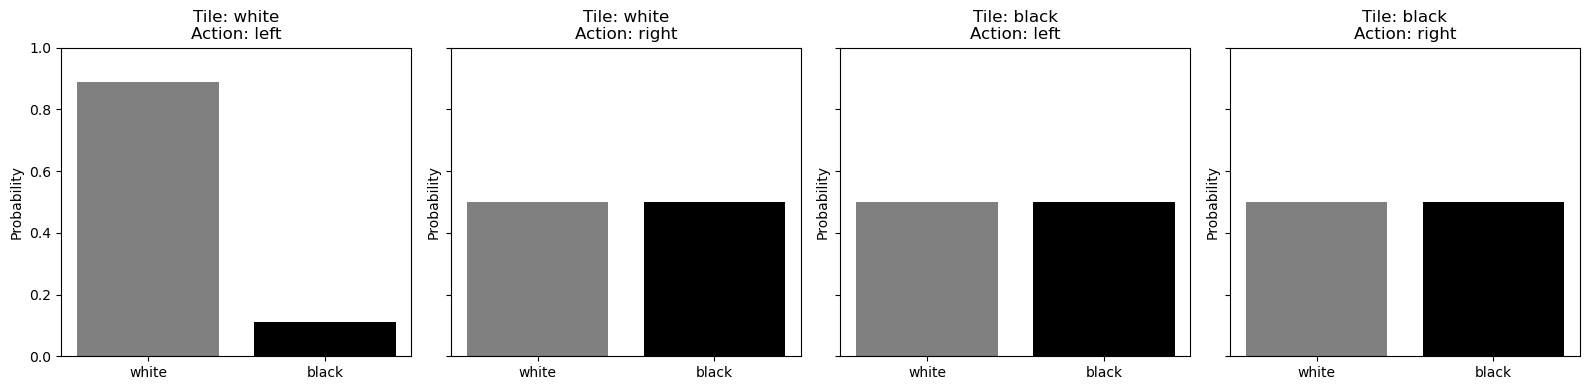

Robot is on white, took action left
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [11]:
# Initiate Robot
robot = Robot()
# Run robot for n steps
for _ in range(n_steps):
    robot.step()